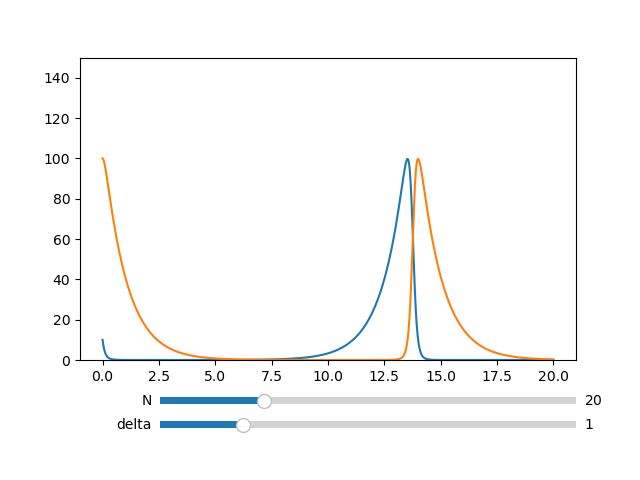

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from matplotlib.widgets import Slider

%matplotlib widget

fact=10
def lv(t,x,params=np.ones((2,2))):
    return [params[0,0]*x[0]-params[0,1]*x[0]*x[1],params[1,0]*x[0]*x[1]-params[1,1]*x[1]]

ys=integrate.solve_ivp(lv,[0,20],[10/fact,100/fact],t_eval=np.linspace(0,20,1000))

fig,ax=plt.subplots()
line_prey,=ax.plot(ys.t,ys.y[0,:]*fact)
line_pred,=ax.plot(ys.t,ys.y[1,:]*fact)
ax.set_ylim([0,150])
fig.subplots_adjust(bottom=0.25)
axdelta=fig.add_axes([0.25,0.1,0.65,0.03])
axn=fig.add_axes([0.25,0.15,0.65,0.03])
delta_slider=Slider(ax=axdelta,label="delta",valmin=0,valmax=5,valinit=1)
n_slider=Slider(ax=axn,label="N",valmin=10,valmax=50,valinit=20,valstep=1)

def update(val):
    ys=integrate.solve_ivp(lambda t,x:lv(t,x,params=np.array([[1,1],[delta_slider.val,1]])),[0,20],[100/fact,n_slider.val/fact],t_eval=np.linspace(0,20,1000))
    line_prey.set_ydata(ys.y[0,:]*fact)
    line_pred.set_ydata(ys.y[1,:]*fact)
    fig.canvas.draw_idle()

delta_slider.on_changed(update)
n_slider.on_changed(update)
plt.show()

# Questions:
# Have x prey animals and y predator animals. Assume that the probability that
# predator animal i encounters prey animal j is 0.1 (for all i and j, during a
# given time period). What is the probability that an encounter happens during
# this time period?
# Can you make them extinct?
# What do the parameters in the eqs. represent?
# What for an influence to N and alpha have?
# Can you think of any practical implications of these observations?
